# Churn Dataset 

Objective: For this exercise, our aim is to find out if a customer churns or not

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('logistic_regression_churn').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.classification import LogisticRegression

# Disable warnings, set Matplotlib inline plotting and load Pandas package
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd



In [2]:
# Read in the CSV data.
data = spark.read.csv('BROADBAND_CHURN_SPSS.csv',inferSchema=True,header=True)



#final_test_data = spark.read.csv('BROADBAND_CHURN_SPSS.csv',inferSchema=True,header=True)


In [3]:
# Print data schema.
data.printSchema()

# Print data columns.
data.columns

root
 |-- FXD_ACCT_KEY: integer (nullable = true)
 |-- CAL_DT_KEY: integer (nullable = true)
 |-- CAL_MTH_KEY: integer (nullable = true)
 |-- MTH_END_FLAG: string (nullable = true)
 |-- OPENING_STATUS: string (nullable = true)
 |-- CLOSING_STATUS: string (nullable = true)
 |-- OPENING_SEGMENT: string (nullable = true)
 |-- CLOSING_SEGMENT: string (nullable = true)
 |-- TECHNOLOGY: string (nullable = true)
 |-- OPENING_BASE: integer (nullable = true)
 |-- ADDITIONS: integer (nullable = true)
 |-- DISCONNECTS: integer (nullable = true)
 |-- CLOSING_BASE: integer (nullable = true)
 |-- GROSS_ADDS: integer (nullable = true)
 |-- CHURN: integer (nullable = true)
 |-- MIGRATIONS: integer (nullable = true)
 |-- TITLE: string (nullable = true)
 |-- SUBURB: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- POST_CODE: string (nullable = true)
 |-- PYMNT_METHOD: string (nullable = true)
 |-- SEG_KEY: integer (nullable = true)
 |-- HIST_START_DTTM: string (nullable = true)
 |-- HIS

['FXD_ACCT_KEY',
 'CAL_DT_KEY',
 'CAL_MTH_KEY',
 'MTH_END_FLAG',
 'OPENING_STATUS',
 'CLOSING_STATUS',
 'OPENING_SEGMENT',
 'CLOSING_SEGMENT',
 'TECHNOLOGY',
 'OPENING_BASE',
 'ADDITIONS',
 'DISCONNECTS',
 'CLOSING_BASE',
 'GROSS_ADDS',
 'CHURN',
 'MIGRATIONS',
 'TITLE',
 'SUBURB',
 'CITY',
 'POST_CODE',
 'PYMNT_METHOD',
 'SEG_KEY',
 'HIST_START_DTTM',
 'HIST_END_DTTM',
 'CURR_IND',
 'PROD_KEY',
 'PROD_CD',
 'PROD_DESCR',
 'PROD_GRP_DESCR',
 'PROD_TYPE',
 'PROD_INTERNAL_DESCR',
 'MLY_FEE_INCL_GST',
 'CARE_CONTACT',
 'DATA_USAGE']

In [4]:
pd.DataFrame(data.take(5), columns=data.columns).transpose()

,0,1,2,3,4
FXD_ACCT_KEY,212540,215540,213980,151459,198740
CAL_DT_KEY,20190831,20190831,20190831,20190831,20190831
CAL_MTH_KEY,201908,201908,201908,201908,201908
MTH_END_FLAG,Y,Y,Y,Y,Y
OPENING_STATUS,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
CLOSING_STATUS,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
OPENING_SEGMENT,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL
CLOSING_SEGMENT,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL
TECHNOLOGY,UFB,UFB,VDSL,UFB,VDSL
OPENING_BASE,1,1,1,1,1


In [12]:
data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
FXD_ACCT_KEY,2976,163350.99159946237,53481.83488616974,853,233660
CAL_DT_KEY,2976,2.0190831E7,0.0,20190831,20190831
CAL_MTH_KEY,2976,201908.0,0.0,201908,201908
MTH_END_FLAG,2976,None,None,Y,Y
OPENING_STATUS,2976,None,None,ACTIVE,PREACTIVE
CLOSING_STATUS,2976,None,None,ACTIVE,NULL
OPENING_SEGMENT,2976,None,None,ENTERPRISE,SME
CLOSING_SEGMENT,2976,None,None,ENTERPRISE,SME
TECHNOLOGY,2976,None,None,ADSL,VDSL


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  
/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=20190831.0, right=20190831.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=201908.0, right=201908.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=20190831.0, top=20190831.0
  'bottom=%s, top=%s') % (bottom, top))
/home/ubuntu/.local/lib/pytho

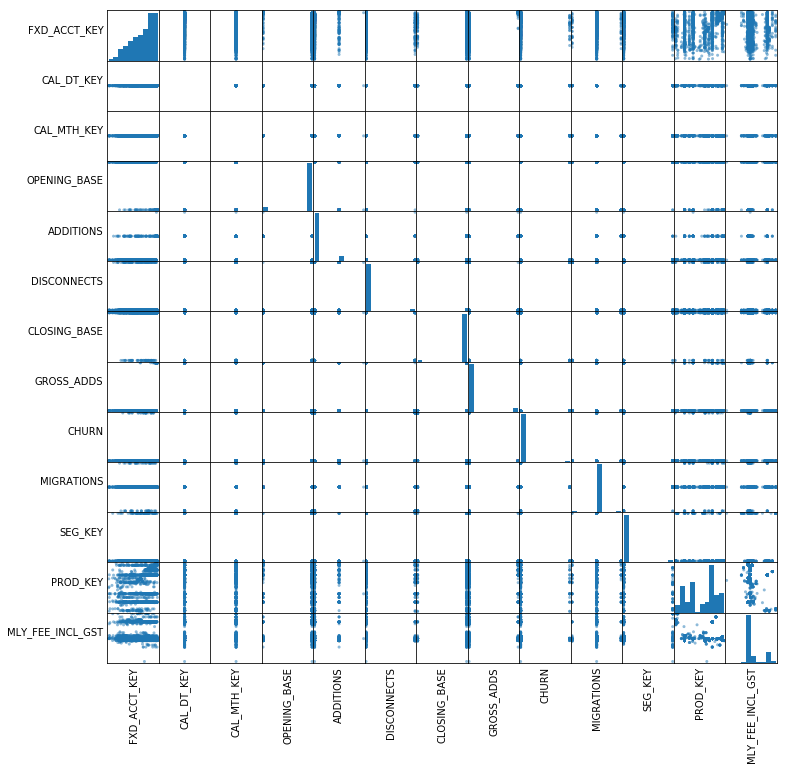

In [11]:
from pandas.plotting import scatter_matrix

numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = data.select(numeric_features).sample(False, 0.10).toPandas()

#axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));
axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));
# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())


In [5]:
from pandas.plotting import scatter_matrix

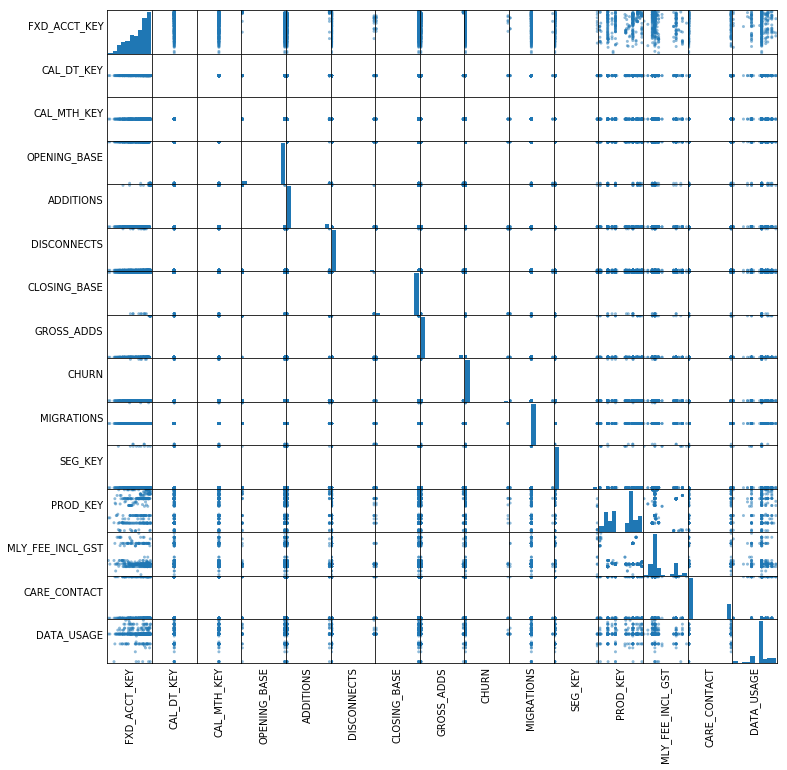

In [6]:

numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = data.select(numeric_features).sample(False, 0.10).toPandas()

#axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));
axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));
# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())


In [7]:





#final_data = data.drop('FXD_ACCT_KEY').drop('CAL_DT_KEY').drop('POST_CODE').drop('CITY') \
#    .drop('CAL_MTH_KEY').drop('MTH_END_FLAG') .drop('CURR_IND').drop('MLY_FEE_INCL_GST') \
#    .drop('TITLE').drop('SUBURB') \
#.drop('HIST_START_DTTM').drop('HIST_END_DTTM') \


my_cols = data.select([ 'ADDITIONS','DISCONNECTS','CLOSING_BASE','GROSS_ADDS','MIGRATIONS',
                       'SEG_KEY','PROD_KEY','CARE_CONTACT','DATA_USAGE','TECHNOLOGY','PROD_TYPE','CHURN'])


final_data=my_cols.na.drop()



In [8]:
# Print data schema.
final_data.printSchema()



final_data.take(5)


root
 |-- ADDITIONS: integer (nullable = true)
 |-- DISCONNECTS: integer (nullable = true)
 |-- CLOSING_BASE: integer (nullable = true)
 |-- GROSS_ADDS: integer (nullable = true)
 |-- MIGRATIONS: integer (nullable = true)
 |-- SEG_KEY: integer (nullable = true)
 |-- PROD_KEY: integer (nullable = true)
 |-- CARE_CONTACT: integer (nullable = true)
 |-- DATA_USAGE: integer (nullable = true)
 |-- TECHNOLOGY: string (nullable = true)
 |-- PROD_TYPE: string (nullable = true)
 |-- CHURN: integer (nullable = true)



[Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=2141, CARE_CONTACT=0, DATA_USAGE=100, TECHNOLOGY='UFB', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=1114, CARE_CONTACT=0, DATA_USAGE=150, TECHNOLOGY='UFB', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=5051, CARE_CONTACT=0, DATA_USAGE=200, TECHNOLOGY='VDSL', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=4852, CARE_CONTACT=0, DATA_USAGE=180, TECHNOLOGY='UFB', PROD_TYPE='PLANTYPE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=2141, CARE_CONTACT=0, DATA_USAGE=170, TECHNOLOGY='VDSL', PROD_TYPE='SUPSERVICE', CHURN=0)]

In [9]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [10]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
technology_indexer = StringIndexer(inputCol='TECHNOLOGY',outputCol='TechIndex')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
technology_encoder = OneHotEncoder(inputCol='TechIndex',outputCol='TechVec')

In [12]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
prodcd_indexer = StringIndexer(inputCol='PROD_TYPE',outputCol='ProdIndex')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
prodcd_encoder = OneHotEncoder(inputCol='ProdIndex',outputCol='ProdVec')


In [13]:
# Now we can assemble all of this as one vector in the features column. 
assembler = VectorAssembler(inputCols=['TechVec',
 'ProdVec','ADDITIONS','DISCONNECTS','CLOSING_BASE'],outputCol='features')






In [14]:
from pyspark.ml.classification import LogisticRegression

Pipelines
A pipeline sets stages for different steps. Let's see an example of how to use pipelines.

In [15]:
from pyspark.ml import Pipeline

In [16]:
# Note that survived is a categorial variable but didn't require any transformation.
# That's because it's already in the format of 1's and 0's. 
log_churn_prd = LogisticRegression(featuresCol='features',labelCol='CHURN')

In [17]:
# Lists everything we want to do. Index data, encode data, assemble data and then pass in the actual model.
pipeline = Pipeline(stages=[technology_indexer,prodcd_indexer,
                           technology_encoder,prodcd_encoder,
                           assembler,log_churn_prd])

In [18]:
# Train/test split. 
train_churn_data, test_churn_data = final_data.randomSplit([0.7,.3])

In [19]:
# Print data schema.
final_data.printSchema()

final_data.take(5)


root
 |-- ADDITIONS: integer (nullable = true)
 |-- DISCONNECTS: integer (nullable = true)
 |-- CLOSING_BASE: integer (nullable = true)
 |-- GROSS_ADDS: integer (nullable = true)
 |-- MIGRATIONS: integer (nullable = true)
 |-- SEG_KEY: integer (nullable = true)
 |-- PROD_KEY: integer (nullable = true)
 |-- CARE_CONTACT: integer (nullable = true)
 |-- DATA_USAGE: integer (nullable = true)
 |-- TECHNOLOGY: string (nullable = true)
 |-- PROD_TYPE: string (nullable = true)
 |-- CHURN: integer (nullable = true)



[Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=2141, CARE_CONTACT=0, DATA_USAGE=100, TECHNOLOGY='UFB', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=1114, CARE_CONTACT=0, DATA_USAGE=150, TECHNOLOGY='UFB', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=5051, CARE_CONTACT=0, DATA_USAGE=200, TECHNOLOGY='VDSL', PROD_TYPE='SUPSERVICE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=4852, CARE_CONTACT=0, DATA_USAGE=180, TECHNOLOGY='UFB', PROD_TYPE='PLANTYPE', CHURN=0),
 Row(ADDITIONS=0, DISCONNECTS=0, CLOSING_BASE=1, GROSS_ADDS=0, MIGRATIONS=0, SEG_KEY=1, PROD_KEY=2141, CARE_CONTACT=0, DATA_USAGE=170, TECHNOLOGY='VDSL', PROD_TYPE='SUPSERVICE', CHURN=0)]

In [20]:
# Note pipeline. Call it as you would call a machine learning object.
fit_model = pipeline.fit(train_churn_data)

In [21]:
# Transform test data. 
results = fit_model.transform(test_churn_data)

In [22]:
# Evaluate the model using the binary classifer.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='CHURN')

In [23]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
results.select('CHURN','prediction').show()

+-----+----------+
|CHURN|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 20 rows



In [25]:
AUC = my_eval.evaluate(results)

AUC

0.8197374778547271

# Data Visualisation
PySpark doesn't allow you to plot data directly. Instead, the simplest way to visualise data is to convert the DataFrame into an array, then use Python's extensive libraries (such as Matplotlib) to visualise the data appropriately. Because of this, the sky's the limit when it comes to data visualisation! Here's a simple example:

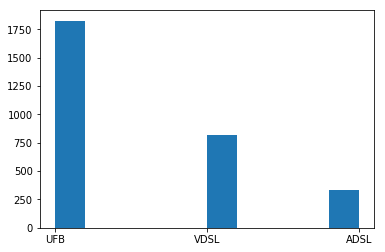

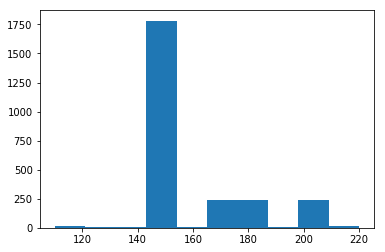

In [27]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert sex to an array using Numpy and plot it using pyplot. 
TechArr = np.array(data.select('TECHNOLOGY').collect())
plt.hist(TechArr)
plt.show()

# Because you can interact with Spark using SQL, you can also filter the data you see. 
# For example, age has some null values. We can remove all null values before visualising the data.
DATA_USAGE_Arr = np.array(data.filter('DATA_USAGE >100').select('DATA_USAGE').collect())
plt.hist(DATA_USAGE_Arr)
plt.show()

In [28]:
# Not all interpretation has to be visualisations. You can also gain a lot of information with text.
# For example, here we're seeing how much variance our model could account for.
# According to this, the model got 164/209 correct. 
totalResults = results.select('CHURN','prediction')

correctResults = totalResults.filter(totalResults['CHURN'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC)) 

Correct: 901
Total Correct: 893


In [47]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=final_data.copy()
df.printSchema()
#df.drop("TECHNOLOGY",axis=1,inplace=True)
#df.drop("PROD_TYPE",axis=1,inplace=True)




ImportError: No module named 'seaborn'

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
print(num_list)
# Create Dataframe containing only numerical features
df_num = df[num_list]


In [ ]:


#Using Pearsons Corelation
df_num.sample(5)
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
